In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


In [6]:
df = pd.read_csv('./house-data-set-cleaned-3.csv')

In [7]:
df.head()

,Unnamed: 0,Location,Price,Beds,Baths,House Size,Land Size
0,0,35,12500000,4,2,1750.0,6.5
1,1,25,29500000,4,4,3510.0,9.0
2,2,28,19000000,4,3,2850.0,7.5
3,3,25,35000000,7,4,1700.0,15.0
4,4,4,29500000,5,4,3500.0,8.0


In [14]:
df_X = df.drop(columns=['Unnamed: 0', 'Price'], axis=1)
df_Y = df['Price']
# df_X.head()
df_Y.head()

0    12500000
1    29500000
2    19000000
3    35000000
4    29500000
Name: Price, dtype: int64

In [10]:
X = df_X.values
Y = df_Y.values

In [15]:
X.shape

(7577, 5)

In [16]:
Y.shape

(7577,)

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.25,
    random_state=42
)

In [18]:
model = RandomForestRegressor(n_jobs=-1)

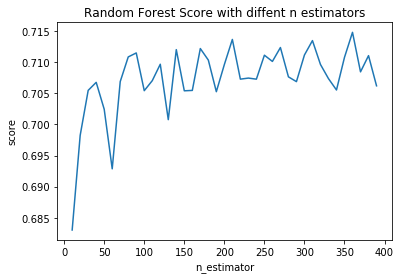

In [27]:
estimators = np.arange(10, 400, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train)
    scores.append(model.score(X_test, Y_test))
plt.title('Random Forest Score with diffent n estimators')
plt.xlabel('n_estimator')
plt.ylabel('score')
plt.plot(estimators, scores)

In [26]:
scores

[0.657498200005892,
 0.6978693256392164,
 0.7063271409492431,
 0.7014538456593831,
 0.7033187647570895,
 0.7022460111761804,
 0.7077859128405468,
 0.7133576890518296,
 0.7119770136471193,
 0.705579824459398,
 0.7133797858444271,
 0.7072837074960694,
 0.7052963889685733,
 0.7113560992805684,
 0.7124921203758177,
 0.6992316829720235,
 0.7060011583712533,
 0.7148192486845362,
 0.7113057832769383]

Scale the data -1 to 1

In [28]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

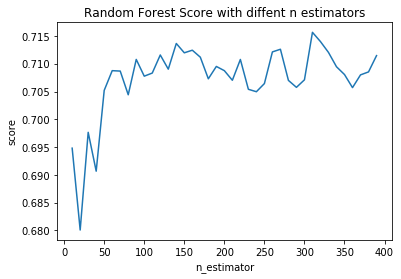

In [29]:
estimators = np.arange(10, 400, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train)
    scores.append(model.score(X_test, Y_test))
plt.title('Random Forest Score with diffent n estimators')
plt.xlabel('n_estimator')
plt.ylabel('score')
plt.plot(estimators, scores)

In [30]:
from sklearn.cluster import DBSCAN


In [31]:
db = DBSCAN(eps=3.0, min_samples=10).fit(X_train)
labels = db.labels_

In [32]:
pd.Series(labels).value_counts()

 0    5672
-1      10
dtype: int64

In [34]:
unique_labels = set(labels)
colors = ['blue', 'red']


In [35]:
unique_labels

{-1, 0}